In [1]:
suppressMessages(library(dplyr))
library(ggplot2)
suppressMessages(library(BoutrosLab.plotting.general))
library(rhdf5)
library(ggpubr)
library(repr)
# Change plot size to BIG
options(repr.plot.width=20, repr.plot.height=10)

# Define function for plotting true vs. estimated coefficients

In [ ]:
coeffs_scatter <- function(alt.coeffs, title) {
    # rename coeffs for plot
    coeff.names <- c("(Intercept)" = expression(beta[0]),
          "guide.eff" = expression(beta[1]),
          "s.score" = expression(beta[2]),
         "g2m.score" = expression(beta[3]),
         "percent.mito" = expression(beta[4]))
    
    p <- alt.coeffs %>%
            mutate(across(term, factor, levels=c("(Intercept)","guide.eff","s.score","g2m.score","percent.mito"))) %>% 
            ggscatter( x = "true", y = "estimate", color = "targeting", palette = "jco", alpha = 0.5,
                      add = "reg.line",  # Add regression line
                      conf.int = TRUE) + 
            stat_cor(method = "spearman", aes(color = targeting), 
                     show.legend = FALSE, geom = "label", 
                     label.y.npc="bottom", label.x.npc = "left",
                    cor.coef.name = "rho", size = 4) + 
            facet_wrap(~term, ncol = 5, 
                       labeller =  as_labeller(coeff.names), scales = "free") + 
                theme(text = element_text(size = 16),
                    plot.title = element_text(size = 16)) +
#                 theme(text = element_text(size = 18)) +
            ggtitle(title)

    return(p)
}

# Define function for calculating MSE

In [3]:
calculate_mse <- function(data) {
    mse <- mean((data$true - data$estimate)^2)
    return(mse)
}

calculate_mse_mod <- function(data) {
    mod <- lm(true ~ estimate, data)
    return(mean(mod$residuals^2))
}

# Modeling counts simulated with continuous $X_1$ and fitting with continuous $X_1$

In [4]:
# data.dir <- "/iblm/netapp/data1/jezhou/crisprQTL/sim_performance_true_efficiency_4guides_cont-x1_cont-counts_targeting_10-10-2022"
data.dir <- "/iblm/netapp/data1/jezhou/crisprQTL/sim_performance_true_efficiency_2guides_cont-x1_cont-counts_targeting_pseudocount"
# data.dir <- "/iblm/netapp/data1/jezhou/crisprQTL/sim_performance_true_efficiency_2guides_indic-x1_cont-counts_targeting_pseudocount-HIGH"

# alt.mods <- readRDS(file.path(data.dir,"sim_performance_true_efficiency_4guides_targeting/alt_ml.rds"))
# null.mods <- readRDS(file.path(data.dir,"sim_performance_true_efficiency_4guides_targeting/null_ml.rds"))

alt.coeffs.cont.counts.cont.x1 <- read.csv(file.path(data.dir,"alt_coeffs.csv"))
null.coeffs.cont.counts.cont.x1 <- read.csv(file.path(data.dir,"null_coeffs.csv"))

# lrt <- read.csv("../sim_performance_100/lrt_pvals.csv")

x1.cont.counts.cont.x1 <- h5read(file.path(data.dir,"x1_with_true_efficiencies.h5"),
                                 name = "x1/x1_continuous")

### Plot true vs. estimated coeffs

In [8]:
# plt.title <- expression(paste("H"[A] ," - modeling counts simulated with continuous X"[1], " fitting to continuous X"[1]))
plt.title <- expression(paste("H"[A] ," - modeling counts simulated with continuous X"[perturb], " fitting to continuous X"[1], "+0.01 pseudocount"))

p.cont.counts.cont.x1 <- coeffs_scatter(alt.coeffs.cont.counts.cont.x1, plt.title)

`geom_smooth()` using formula 'y ~ x'



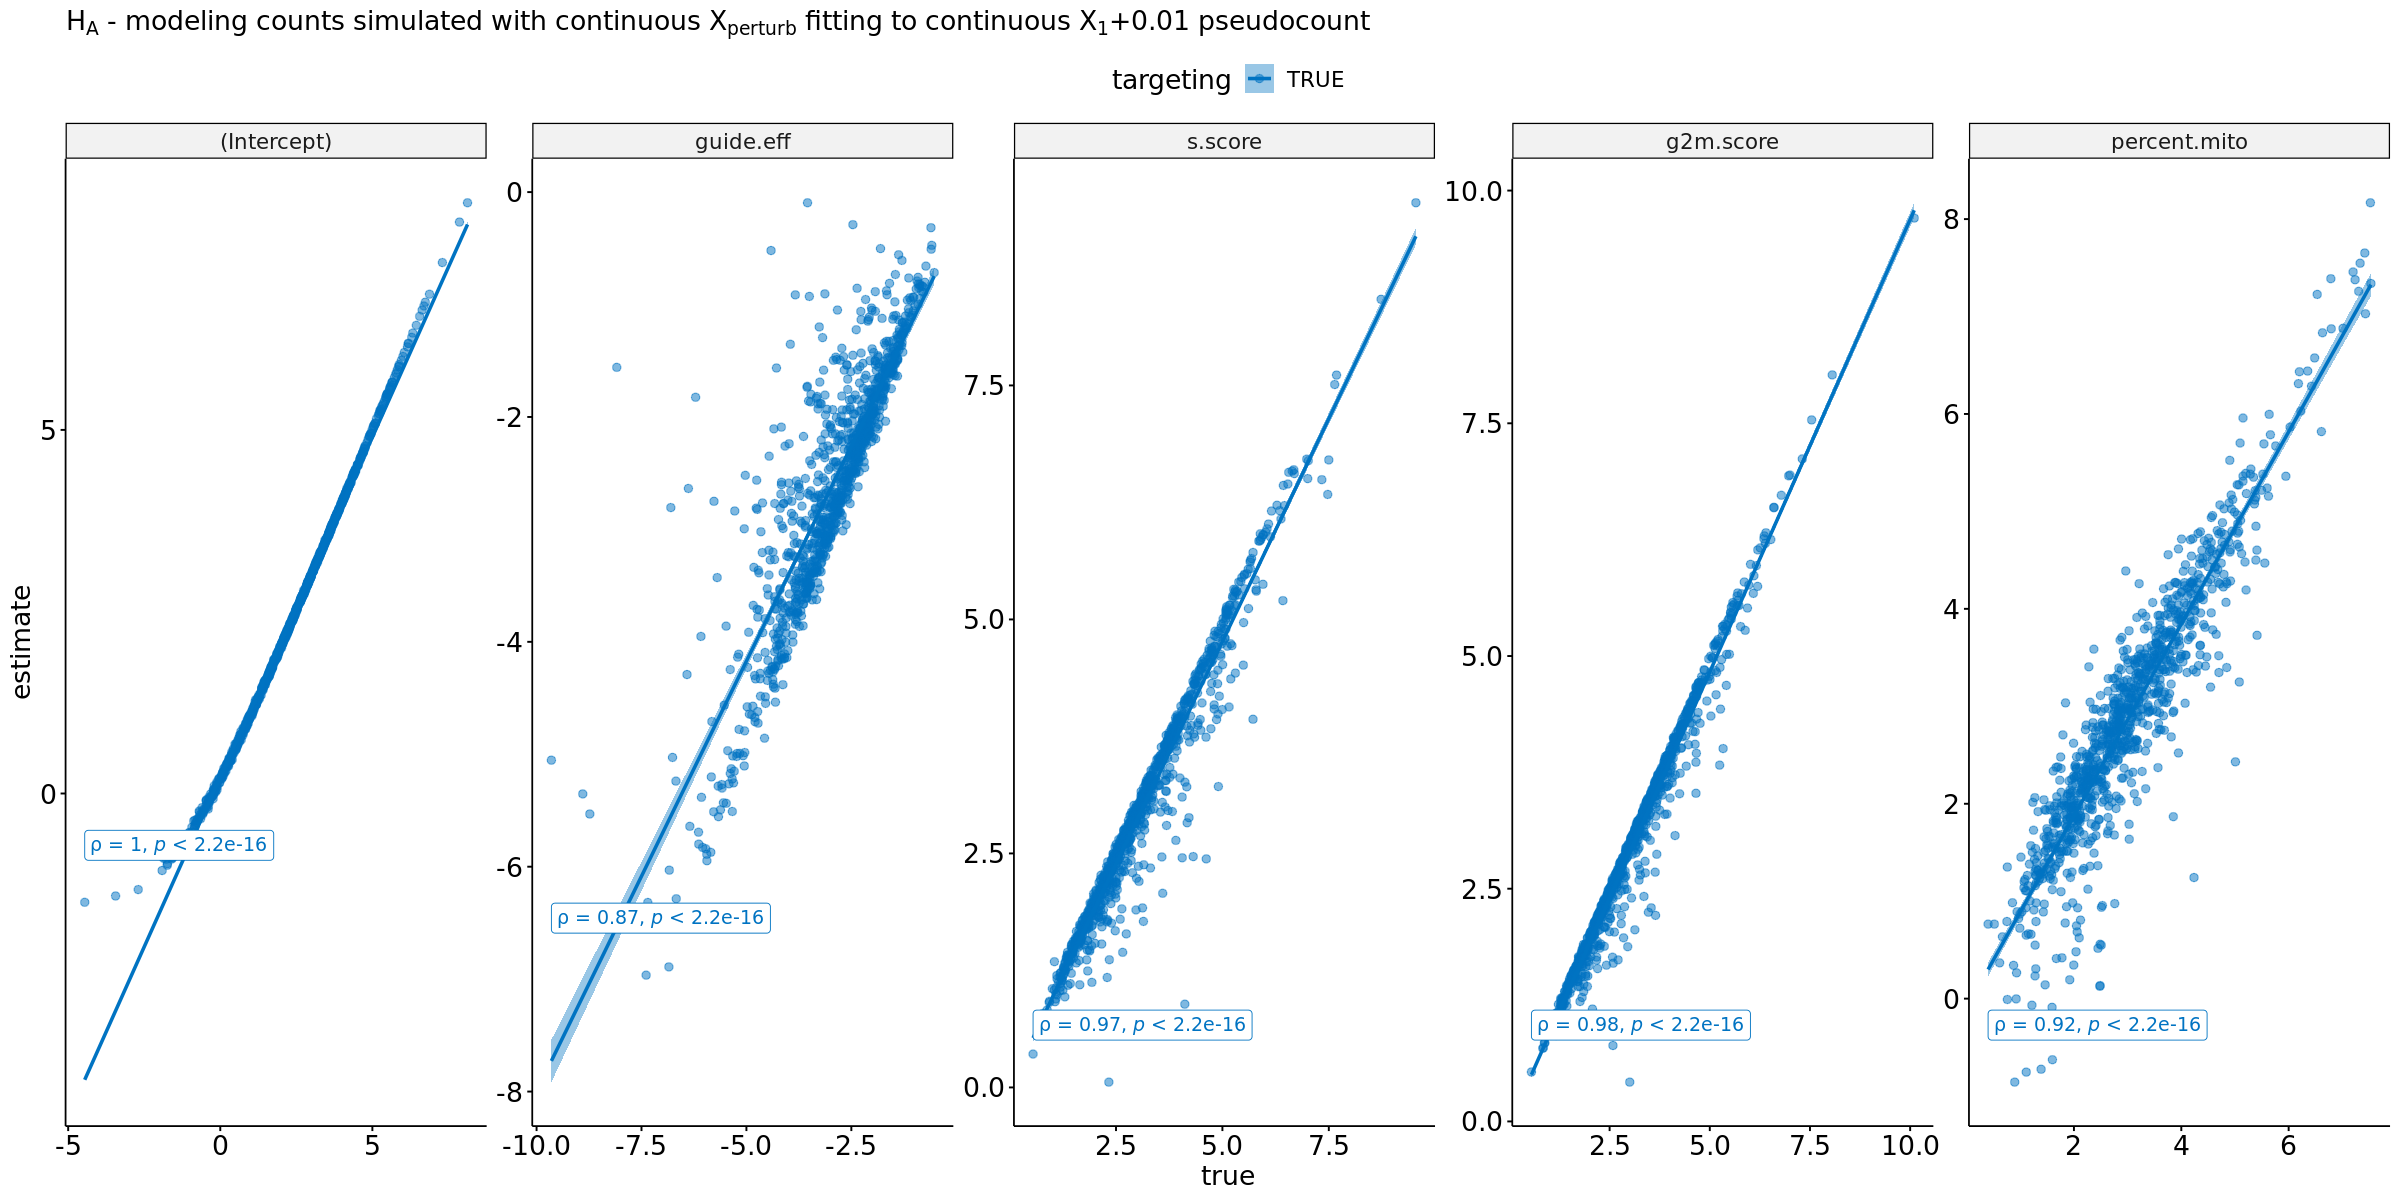

In [9]:
p.cont.counts.cont.x1


In [10]:
png(file.path(data.dir,
              "alt_coeffs_scatterplot_cont-counts_cont-x1.png"),
    res = 300, units = "in", height = 6, width = 12)
print(p.cont.counts.cont.x1)
dev.off()

tiff(file.path(data.dir,
               "alt_coeffs_scatterplot_cont-counts_cont_cont-x1.tiff"),
    res = 100, units = "in", height = 6, width = 12)
print(p.cont.counts.cont.x1)
dev.off()

`geom_smooth()` using formula 'y ~ x'



png 
  2

`geom_smooth()` using formula 'y ~ x'



png 
  2

Calculate MSE

In [11]:
# based on diff b/w true and estimated coeff
alt.coeffs.cont.counts.cont.x1 %>% group_by(term) %>% 
                                    group_map(~calculate_mse(.x)) %>% 
                                    setNames(unique(sort(alt.coeffs.cont.counts.cont.x1$term)))

$`(Intercept)`
[1] 0.03726403

$g2m.score
[1] 0.06522213

$guide.eff
[1] 0.5200973

$percent.mito
[1] 0.2584174

$s.score
[1] 0.1075806

In [12]:
# based on fitting model
alt.coeffs.cont.counts.cont.x1 %>% group_by(term) %>% 
                                    group_map(~calculate_mse_mod(.x)) %>% 
                                    setNames(unique(sort(alt.coeffs.cont.counts.cont.x1$term)))

$`(Intercept)`
[1] 0.01994605

$g2m.score
[1] 0.05147199

$guide.eff
[1] 0.3893498

$percent.mito
[1] 0.2100869

$s.score
[1] 0.08595973

# Modeling counts simulated with continuous $X_1$ and fitting with indicator $X_1$

In [13]:
# data.dir <- "/iblm/netapp/data1/jezhou/crisprQTL/sim_performance_true_efficiency_4guides_indic-x1_cont-counts_targeting"
data.dir <- "/iblm/netapp/data1/jezhou/crisprQTL/sim_performance_true_efficiency_2guides_indic-x1_cont-counts_targeting_pseudocount"
# data.dir <- "/iblm/netapp/data1/jezhou/crisprQTL/sim_performance_true_efficiency_2guides_indic-x1_cont-counts_targeting_pseudocount-HIGH"


# alt.mods <- readRDS(file.path(data.dir,"sim_performance_true_efficiency_4guides_targeting/alt_ml.rds"))
# null.mods <- readRDS(file.path(data.dir,"sim_performance_true_efficiency_4guides_targeting/null_ml.rds"))

alt.coeffs.cont.counts.indic.x1 <- read.csv(file.path(data.dir,"alt_coeffs.csv"))
null.coeffs.cont.counts.indic.x1 <- read.csv(file.path(data.dir,"null_coeffs.csv"))

# lrt <- read.csv("../sim_performance_100/lrt_pvals.csv")

x1.cont.counts.indic.x1 <- h5read(file.path(data.dir,"x1_with_true_efficiencies.h5"),
                                 name = "x1/x1_indicator")

### Plot true vs. estimated coeffs

In [14]:
# plt.title <- expression(paste("H"[A] ," - modeling counts simulated with continuous X"[1], " fitting to indicator X"[1]))
plt.title <- expression(paste("H"[A] ," - modeling counts simulated with continuous X"[perturb], " fitting to indicator X"[1], "+0.01 pseudocount"))


p.cont.counts.indic.x1 <- coeffs_scatter(alt.coeffs.cont.counts.indic.x1, plt.title)

`geom_smooth()` using formula 'y ~ x'



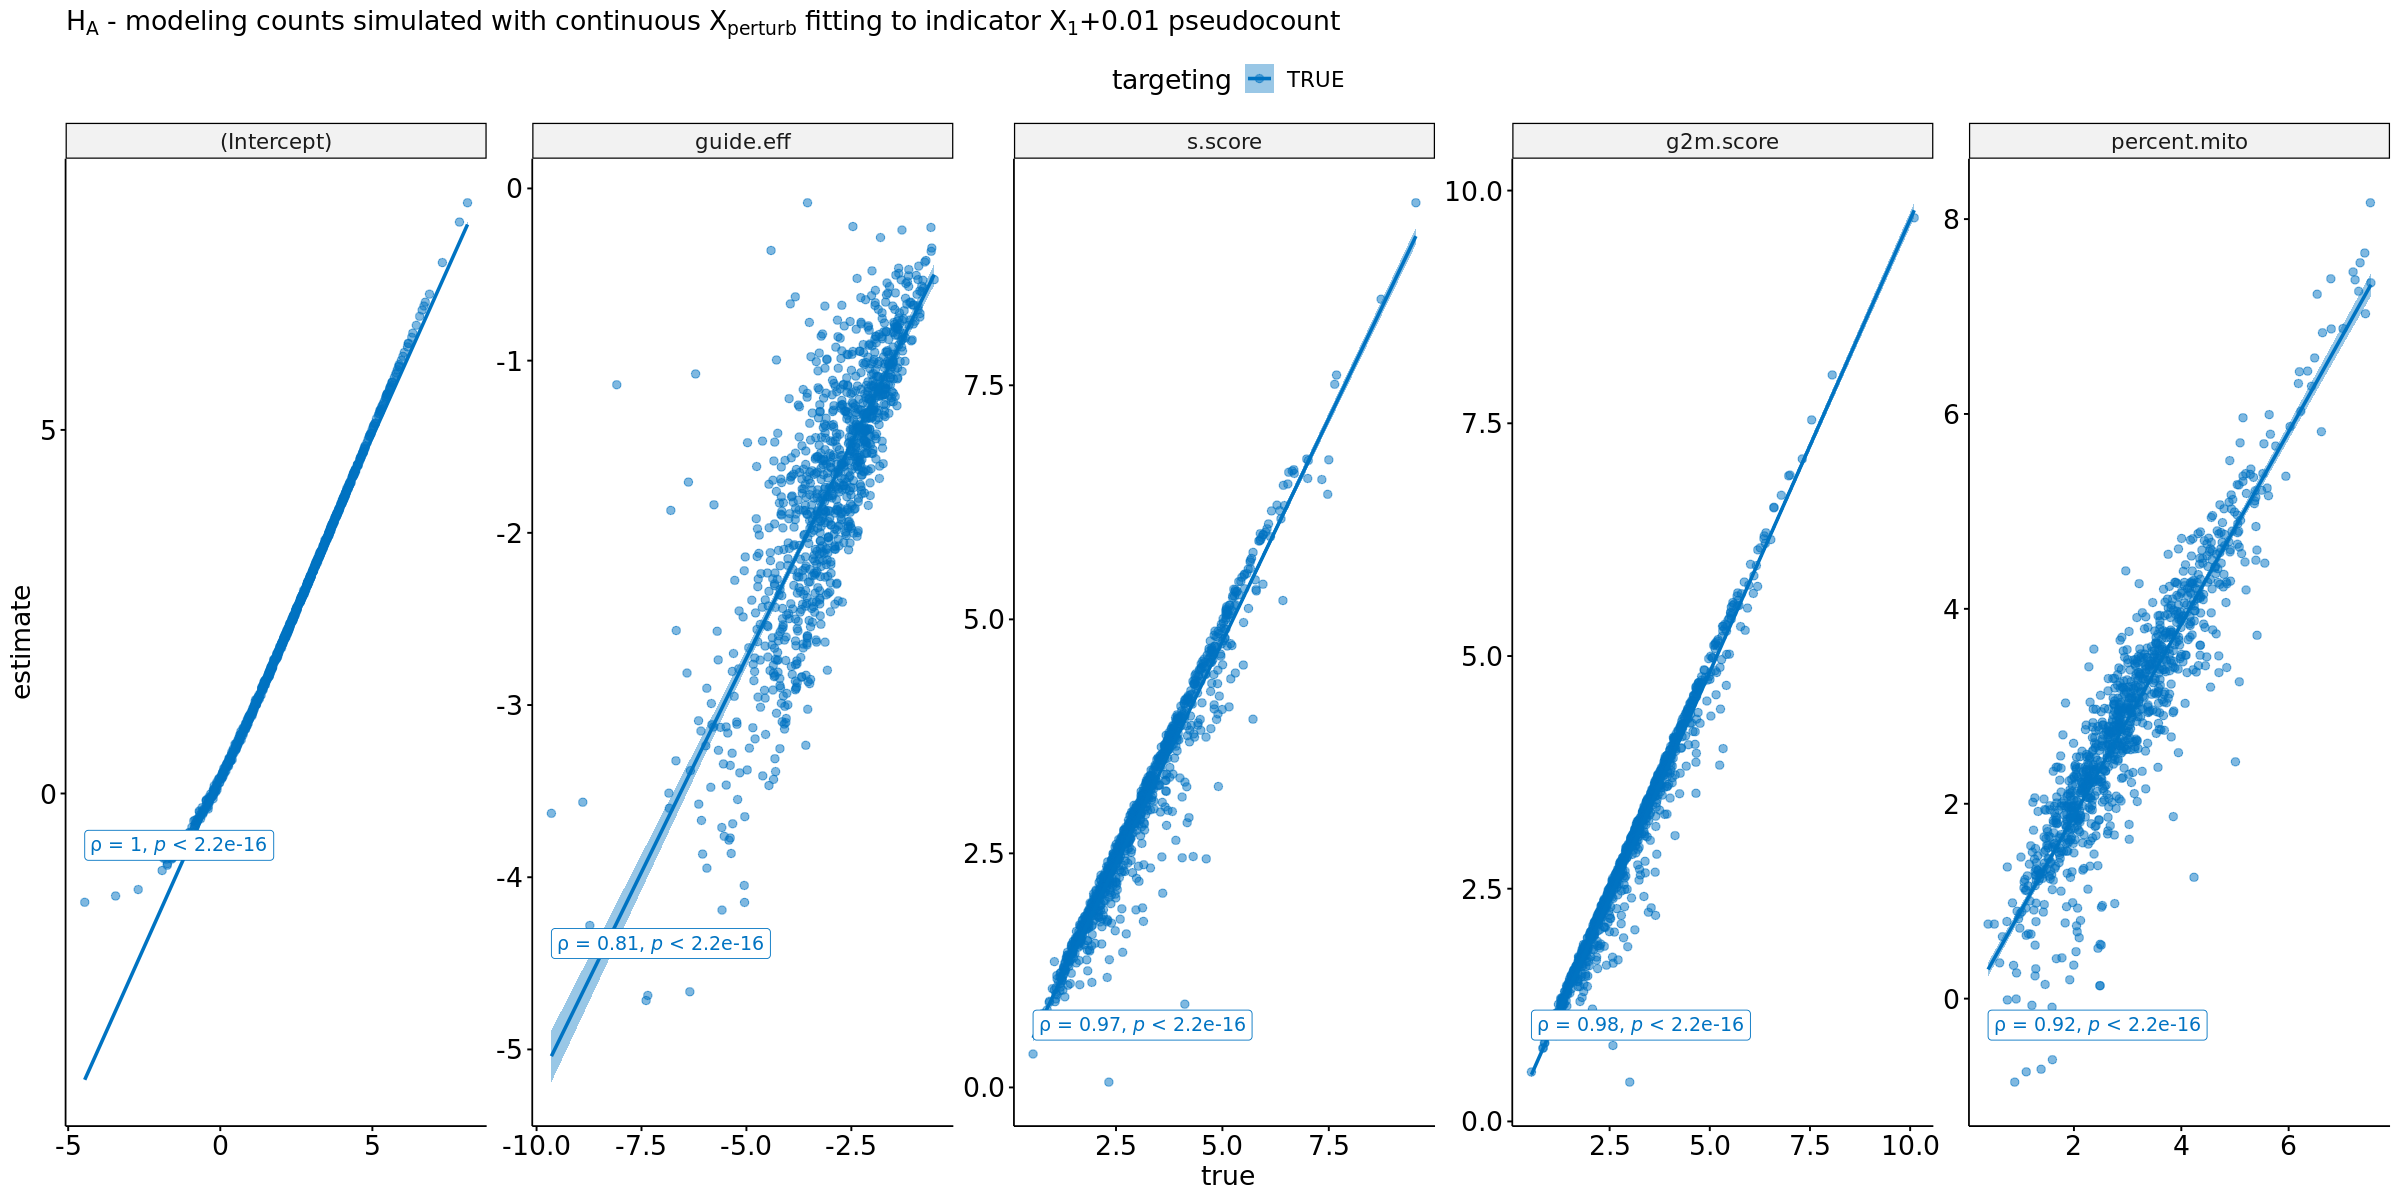

In [15]:
p.cont.counts.indic.x1

In [16]:
png(file.path(data.dir,
              "alt_coeffs_scatterplot_cont-counts_indic-x1.png"),
    res = 300, units = "in", height = 6, width = 12)
print(p.cont.counts.indic.x1)
dev.off()

tiff(file.path(data.dir,
               "alt_coeffs_scatterplot_cont-counts_cont_indic-x1.tiff"),
    res = 100, units = "in", height = 6, width = 12)
print(p.cont.counts.indic.x1)
dev.off()

`geom_smooth()` using formula 'y ~ x'



png 
  2

`geom_smooth()` using formula 'y ~ x'



png 
  2

Calculate MSE

In [1]:
# based on diff b/w true and estimate coeff
alt.coeffs.cont.counts.indic.x1 %>% group_by(term) %>% 
                                    group_map(~calculate_mse(.x)) %>% 
                                    setNames(unique(sort(alt.coeffs.cont.counts.indic.x1$term)))

ERROR: Error in alt.coeffs.cont.counts.indic.x1 %>% group_by(term) %>% group_map(~calculate_mse(.x)) %>% : could not find function "%>%"


In [18]:
# based on fitting model
alt.coeffs.cont.counts.indic.x1 %>% group_by(term) %>% 
                                    group_map(~calculate_mse_mod(.x)) %>% 
                                    setNames(unique(sort(alt.coeffs.cont.counts.indic.x1$term)))

$`(Intercept)`
[1] 0.01994824

$g2m.score
[1] 0.05146613

$guide.eff
[1] 0.5186936

$percent.mito
[1] 0.2100503

$s.score
[1] 0.08596476

# Plot continuous vs. indicator $X_1$ on same plot

In [19]:
alt.coeffs.cont.counts.indic.x1$X1 <- 'indicator'
alt.coeffs.cont.counts.cont.x1$X1 <- 'continuous'

alt.coeffs.x1.plotdf <- do.call(rbind, 
                                   list(alt.coeffs.cont.counts.indic.x1, 
                                        alt.coeffs.cont.counts.cont.x1))

`geom_smooth()` using formula 'y ~ x'



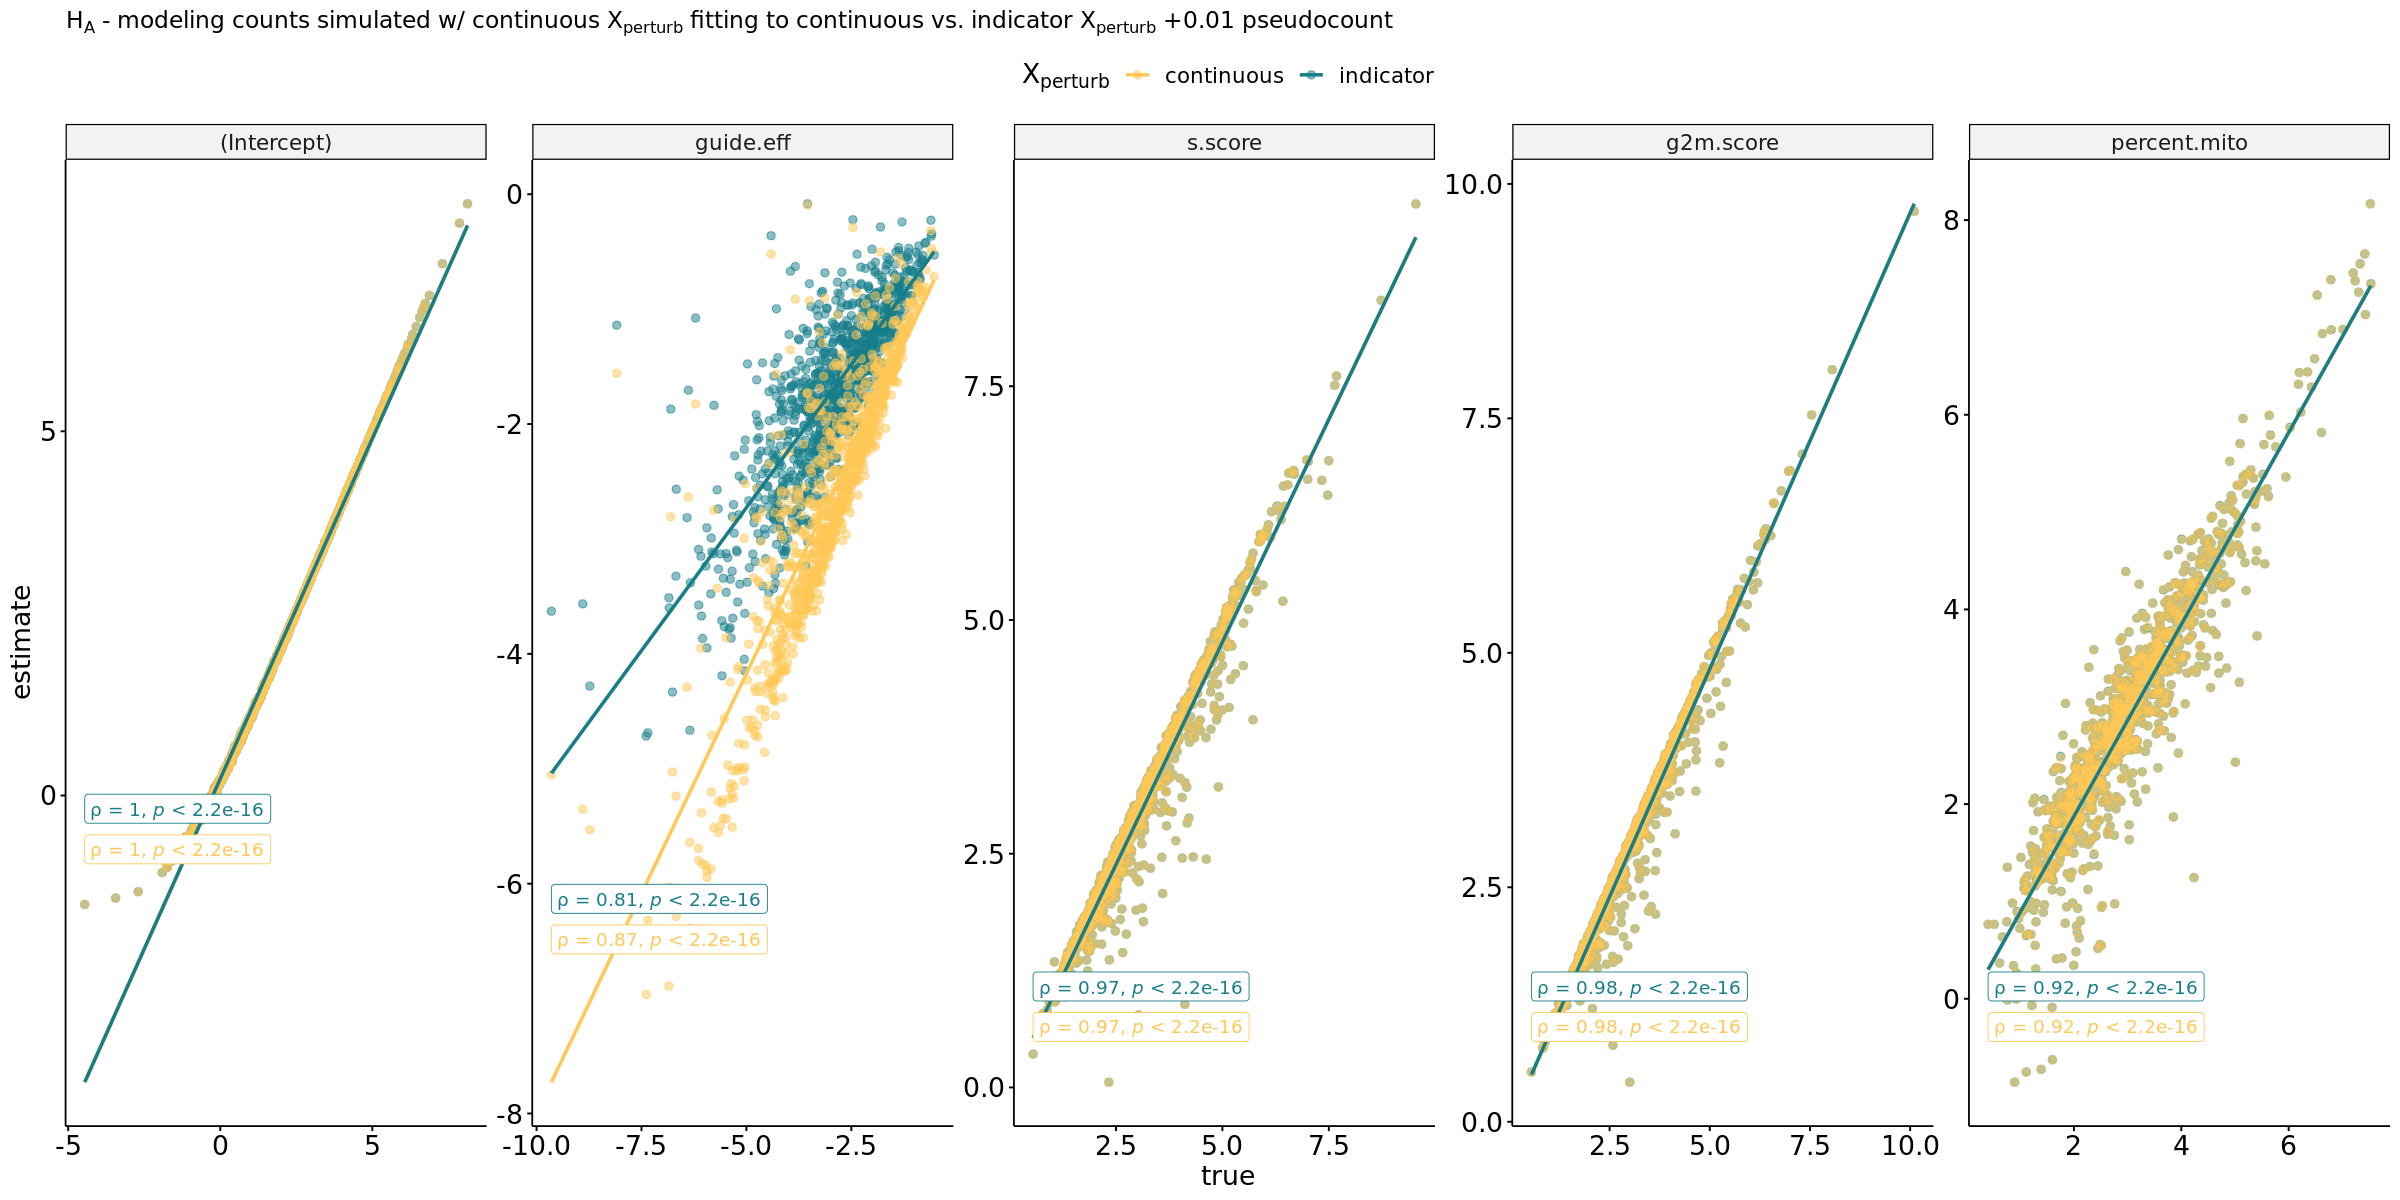

In [24]:
group.colors <- c(`continuous` = "#FFC857", `indicator` = "#177E89")

alt.coeffs.x1.plotdf %>%
        mutate(across(term, factor, levels=c("(Intercept)","guide.eff","s.score","g2m.score","percent.mito"))) %>% 
        ggscatter(x = "true", y = "estimate", color = "X1", alpha = 0.5,
                  add = "reg.line"  # Add regression line
#                   conf.int = TRUE # add conf int
                 ) + 
        stat_cor(method = "spearman", aes(color = `X1`), 
                 show.legend = FALSE, geom = "label", 
                 label.y.npc="bottom", label.x.npc = "left",
                cor.coef.name = "rho") + 
        facet_wrap(~term, ncol = 5,  scales = "free") + 
            theme(text = element_text(size = 16),
                 plot.title = element_text(size = 14)) + 
scale_fill_manual(values=group.colors) + 
scale_color_manual(values = group.colors) +
labs(color=expression(paste("X"[perturb]))) +
        ggtitle(expression(paste("H"[A] ," - modeling counts simulated w/ continuous X"[perturb], " fitting to continuous vs. indicator X"[perturb], " +0.01 pseudocount")))

In [25]:
png(file.path(
#                 data.dir,
                "/iblm/netapp/data1/jezhou/crisprQTL/",
              "alt_coeffs_scatterplot_cont-counts_cont-vs-indicator-x1_PSEUDOCOUNT.png"),
    res = 300, units = "in", height = 6, width = 12)
print(
alt.coeffs.x1.plotdf %>%
        mutate(across(term, factor, levels=c("(Intercept)","guide.eff","s.score","g2m.score","percent.mito"))) %>% 
        ggscatter(x = "true", y = "estimate", color = "X1", alpha = 0.5,
                  add = "reg.line"  # Add regression line
#                   conf.int = TRUE # add conf int
                 ) + 
        stat_cor(method = "spearman", aes(color = `X1`), 
                 show.legend = FALSE, geom = "label", 
                 label.y.npc="bottom", label.x.npc = "left",
                 cor.coef.name = "rho")+ 
        facet_wrap(~term, ncol = 5,  scales = "free") + 
            theme(text = element_text(size = 16),
                 plot.title = element_text(size = 14)) + 
scale_fill_manual(values=group.colors) + 
scale_color_manual(values = group.colors) +
    labs(color=expression(paste("X"[perturb]))) +
        ggtitle(expression(paste("H"[A] ," - modeling counts simulated w/ continuous X"[perturb], " fitting to continuous vs. indicator X"[perturb], "+0.01 pseudocount")))
)
dev.off()

tiff(file.path(
#                 data.dir,
                "/iblm/netapp/data1/jezhou/crisprQTL/",
               "alt_coeffs_scatterplot_cont-counts_cont-vs-indicator-x1_PSEUDOCOUNT.tiff"),
    res = 100, units = "in", height = 6, width = 12)
print(
alt.coeffs.x1.plotdf %>%
        mutate(across(term, factor, levels=c("(Intercept)","guide.eff","s.score","g2m.score","percent.mito"))) %>% 
        ggscatter(x = "true", y = "estimate", color = "X1", alpha = 0.5,
                  add = "reg.line"  # Add regression line
#                   conf.int = TRUE # add conf int
                 ) + 
        stat_cor(method = "spearman", aes(color = `X1`), 
                 show.legend = FALSE, geom = "label", 
                 label.y.npc="bottom", label.x.npc = "left",
                 cor.coef.name = "rho")+ 
        facet_wrap(~term, ncol = 5,  scales = "free") + 
            theme(text = element_text(size = 16),
                 plot.title = element_text(size = 14)) + 
scale_fill_manual(values=group.colors) + 
scale_color_manual(values = group.colors) +
    labs(color=expression(paste("X"[perturb]))) +
        ggtitle(expression(paste("H"[A] ," - modeling counts simulated w/ continuous X"[perturb], " fitting to continuous vs. indicator X"[perturb], "+0.01 pseudocount")))
)
dev.off()

`geom_smooth()` using formula 'y ~ x'



png 
  2

`geom_smooth()` using formula 'y ~ x'



png 
  2

Make dataframe comparing MSE

In [87]:
cont.x1.mse <- alt.coeffs.cont.counts.cont.x1 %>% group_by(term) %>% 
                                    group_map(~calculate_mse_mod(.x)) %>% 
                                    setNames(unique(sort(alt.coeffs.cont.counts.cont.x1$term)))


indic.x1.mse <- alt.coeffs.cont.counts.indic.x1 %>% group_by(term) %>% 
                                    group_map(~calculate_mse_mod(.x)) %>% 
                                    setNames(unique(sort(alt.coeffs.cont.counts.indic.x1$term)))

In [88]:
mse.combined <- rbind(data.frame(cont.x1.mse), data.frame(indic.x1.mse))
mse.combined.t <- data.frame(t(mse.combined))
colnames(mse.combined.t) <- c("continuous","indicator")
head(mse.combined.t)

,continuous,indicator
,<dbl>,<dbl>
X.Intercept.,0.01994605,0.01994824
g2m.score,0.05147199,0.05146613
guide.eff,0.38934976,0.51869355
percent.mito,0.21008690,0.21005027
s.score,0.08595973,0.08596476


In [92]:
write.csv(mse.combined.t, "/iblm/netapp/data1/jezhou/crisprQTL/cont_vs_indic_x1_mse_table.csv",
           quote = FALSE)

Compare model fit score

In [33]:
cont.x1.alt.mods <- readRDS("/iblm/netapp/data1/jezhou/crisprQTL/sim_performance_true_efficiency_4guides_cont-x1_cont-counts_targeting_10-10-2022/alt_ml.rds")
cont.x1.null.mods <- readRDS("/iblm/netapp/data1/jezhou/crisprQTL/sim_performance_true_efficiency_4guides_cont-x1_cont-counts_targeting_10-10-2022/null_ml.rds")


# Examining noisy guide efficiencies

## Modeling counts simulated with continuous $X_1$ and fitting with continuous $X_1$ based on noisy ($D=100$) guide efficiencies

In [5]:
# data.dir <- "/iblm/netapp/data1/jezhou/crisprQTL/sim_performance_D100-noisy_4guides_cont-x1_cont-counts_targeting"
data.dir <- "/iblm/netapp/data1/jezhou/crisprQTL/sim_performance_D100-noisy_2guides_cont-x1_cont-counts_targeting_pseuodocount"

# alt.mods <- readRDS(file.path(data.dir,"sim_performance_true_efficiency_4guides_targeting/alt_ml.rds"))
# null.mods <- readRDS(file.path(data.dir,"sim_performance_true_efficiency_4guides_targeting/null_ml.rds"))

alt.coeffs.cont.counts.d100.cont.x1 <- read.csv(file.path(data.dir,"alt_coeffs.csv"))
null.coeffs.cont.counts.d100.cont.x1 <- read.csv(file.path(data.dir,"null_coeffs.csv"))

# lrt <- read.csv("../sim_performance_100/lrt_pvals.csv")

# x1.cont.counts.indic.x1 <- h5read("/iblm/netapp/data1/jezhou/crisprQTL/sim_performance_D100-noisy_4guides_cont-x1_cont-counts_targeting/x1_with_true_efficiencies.h5",
#                                  name = "x1/x1_continuous")

`geom_smooth()` using formula 'y ~ x'



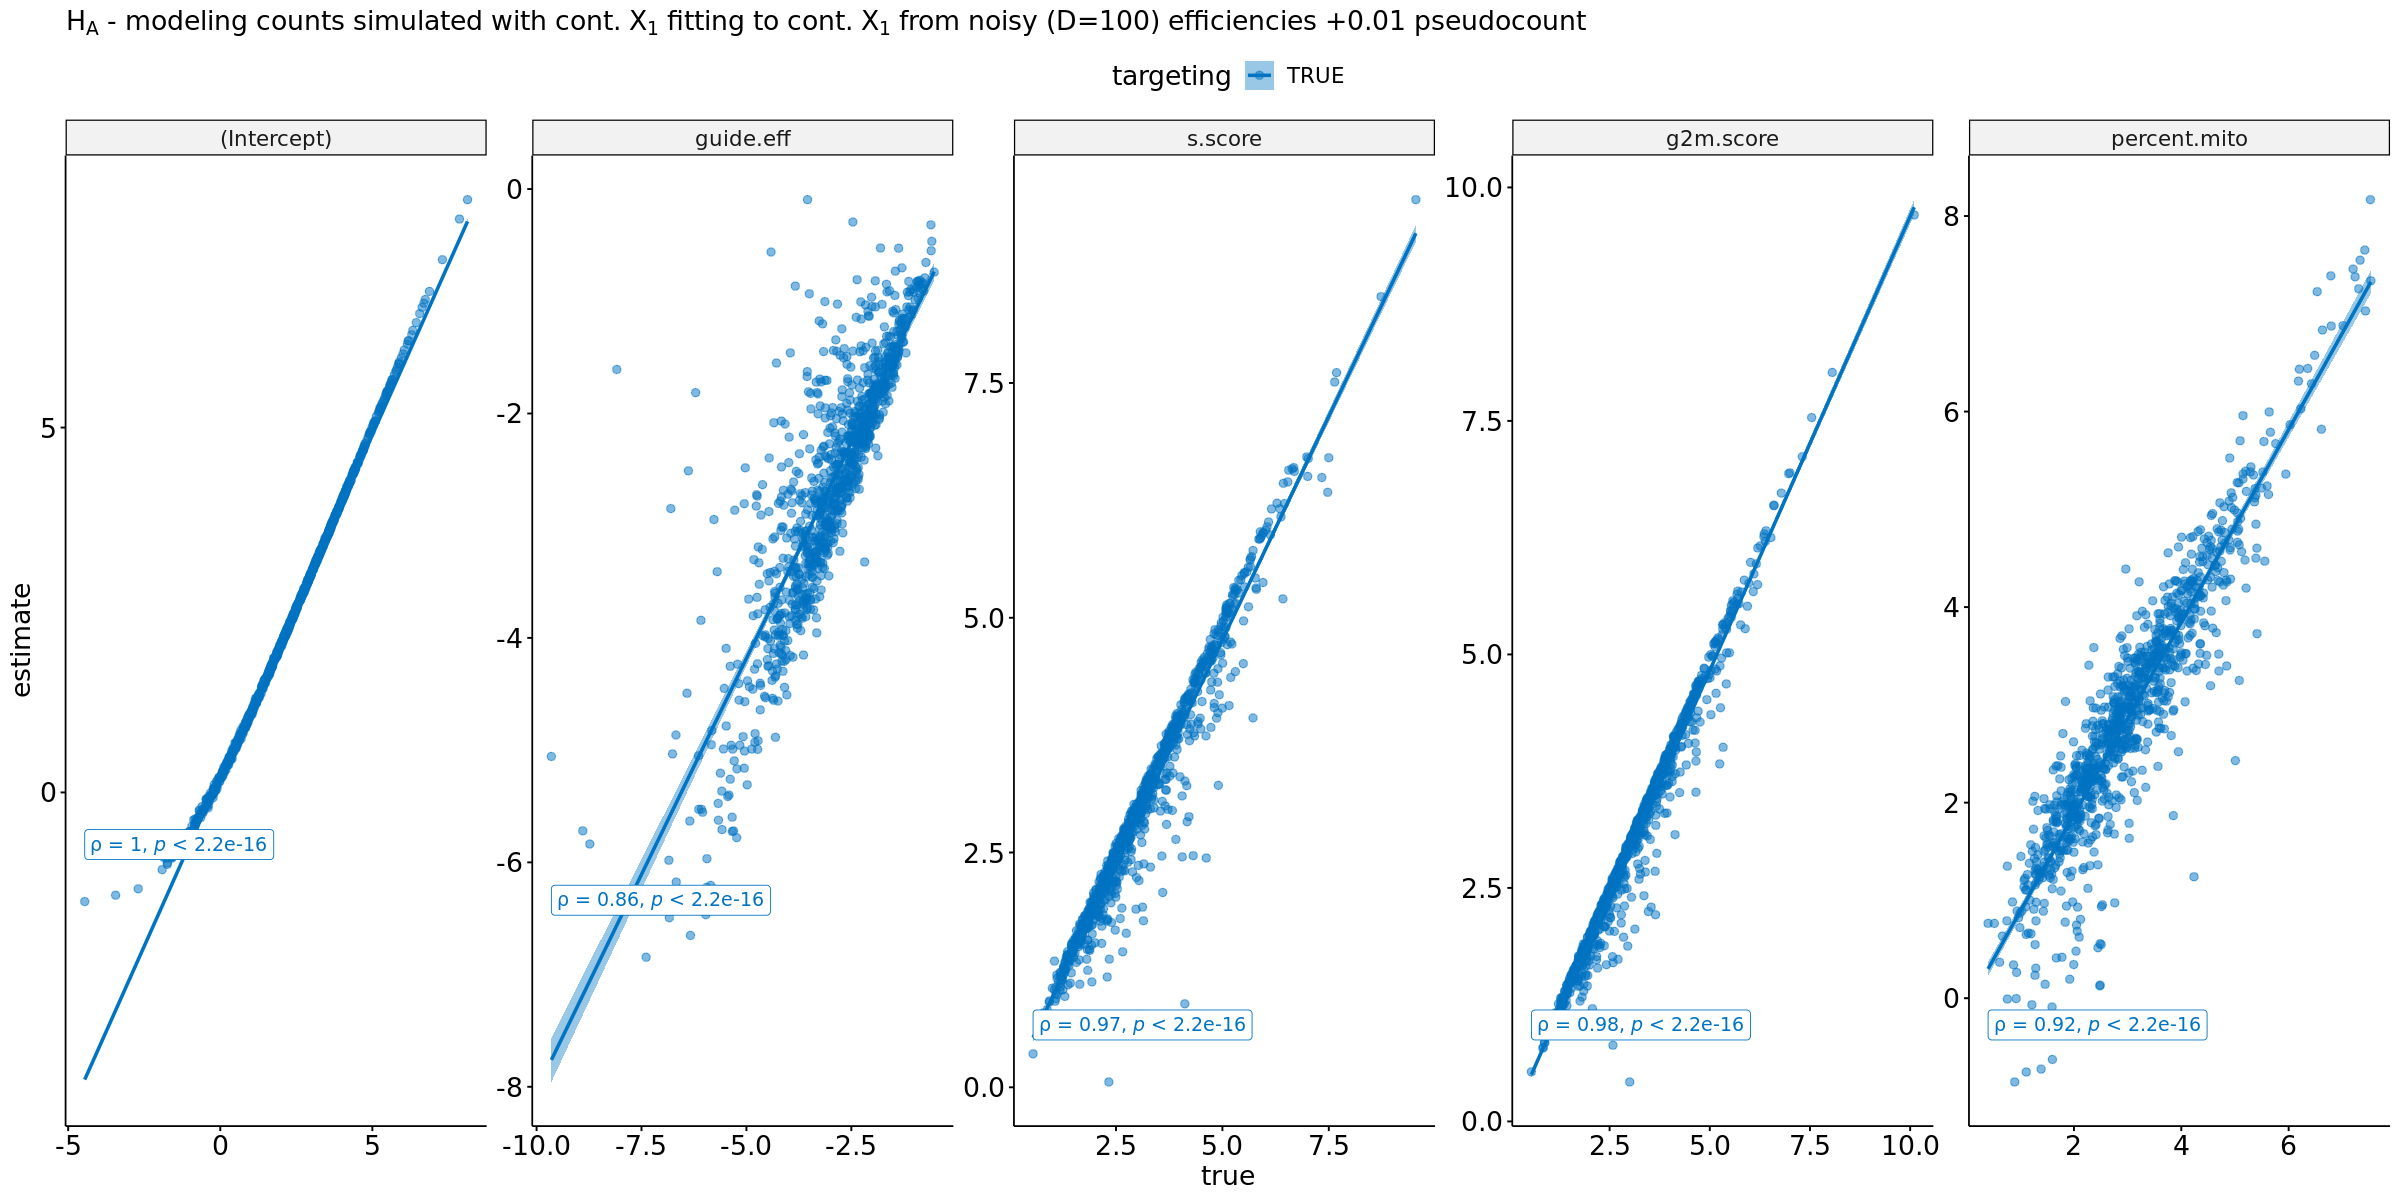

In [6]:
plt.title <- expression(paste("H"[A] ," - modeling counts simulated with cont. X"[1], " fitting to cont. X"[1], " from noisy (D=100) efficiencies +0.01 pseudocount"))

p.cont.counts.d100.cont.x1 <- coeffs_scatter(alt.coeffs.cont.counts.d100.cont.x1, plt.title)

p.cont.counts.d100.cont.x1

In [54]:
png(file.path(data.dir,
              "alt_coeffs_scatterplot_cont-counts_cont-x1_d100-noisy.png"),
    res = 300, units = "in", height = 7, width = 14)
print(p.cont.counts.d100.cont.x1)
dev.off()

tiff(file.path(data.dir,
               "alt_coeffs_scatterplot_cont-counts_cont_cont-x1_d100-noisy.tiff"),
    res = 100, units = "in", height = 7, width = 14)
print(p.cont.counts.d100.cont.x1)
dev.off()

`geom_smooth()` using formula 'y ~ x'



png 
  2

`geom_smooth()` using formula 'y ~ x'



png 
  2

Calculate MSE

In [7]:
# based on diff b/w true and estimated coeffs
alt.coeffs.cont.counts.d100.cont.x1 %>% group_by(term) %>% 
                                        group_map(~calculate_mse(.x)) %>% 
                                        setNames(unique(sort(alt.coeffs.cont.counts.d100.cont.x1$term)))

$`(Intercept)`
[1] 0.03726286

$g2m.score
[1] 0.06522047

$guide.eff
[1] 0.5420232

$percent.mito
[1] 0.2584192

$s.score
[1] 0.1075825

In [8]:
# based on fitting model
alt.coeffs.cont.counts.d100.cont.x1 %>% group_by(term) %>% 
                                        group_map(~calculate_mse_mod(.x)) %>% 
                                        setNames(unique(sort(alt.coeffs.cont.counts.d100.cont.x1$term)))

$`(Intercept)`
[1] 0.01994554

$g2m.score
[1] 0.05147178

$guide.eff
[1] 0.4094257

$percent.mito
[1] 0.2100936

$s.score
[1] 0.08596031

## Modeling counts simulated with continuous $X_1$ and fitting with continuous $X_1$ based on noisy ($D=10$) guide efficiencies

In [9]:
# data.dir <- "/iblm/netapp/data1/jezhou/crisprQTL/sim_performance_D10-noisy_4guides_cont-x1_cont-counts_targeting"
data.dir <- "/iblm/netapp/data1/jezhou/crisprQTL/sim_performance_D10-noisy_2guides_cont-x1_cont-counts_targeting_pseudocount"


# alt.mods <- readRDS(file.path(data.dir,"sim_performance_true_efficiency_4guides_targeting/alt_ml.rds"))
# null.mods <- readRDS(file.path(data.dir,"sim_performance_true_efficiency_4guides_targeting/null_ml.rds"))

alt.coeffs.cont.counts.d10.cont.x1 <- read.csv(file.path(data.dir,"alt_coeffs.csv"))
null.coeffs.cont.counts.d10.cont.x1 <- read.csv(file.path(data.dir,"null_coeffs.csv"))

# lrt <- read.csv("../sim_performance_100/lrt_pvals.csv")

### Check which genes did not converge

In [25]:
alt.mods <- readRDS(file.path(data.dir, "alt_ml.rds"))

In [26]:
which(is.na(alt.mods))

8337 
 615

### Plot

`geom_smooth()` using formula 'y ~ x'



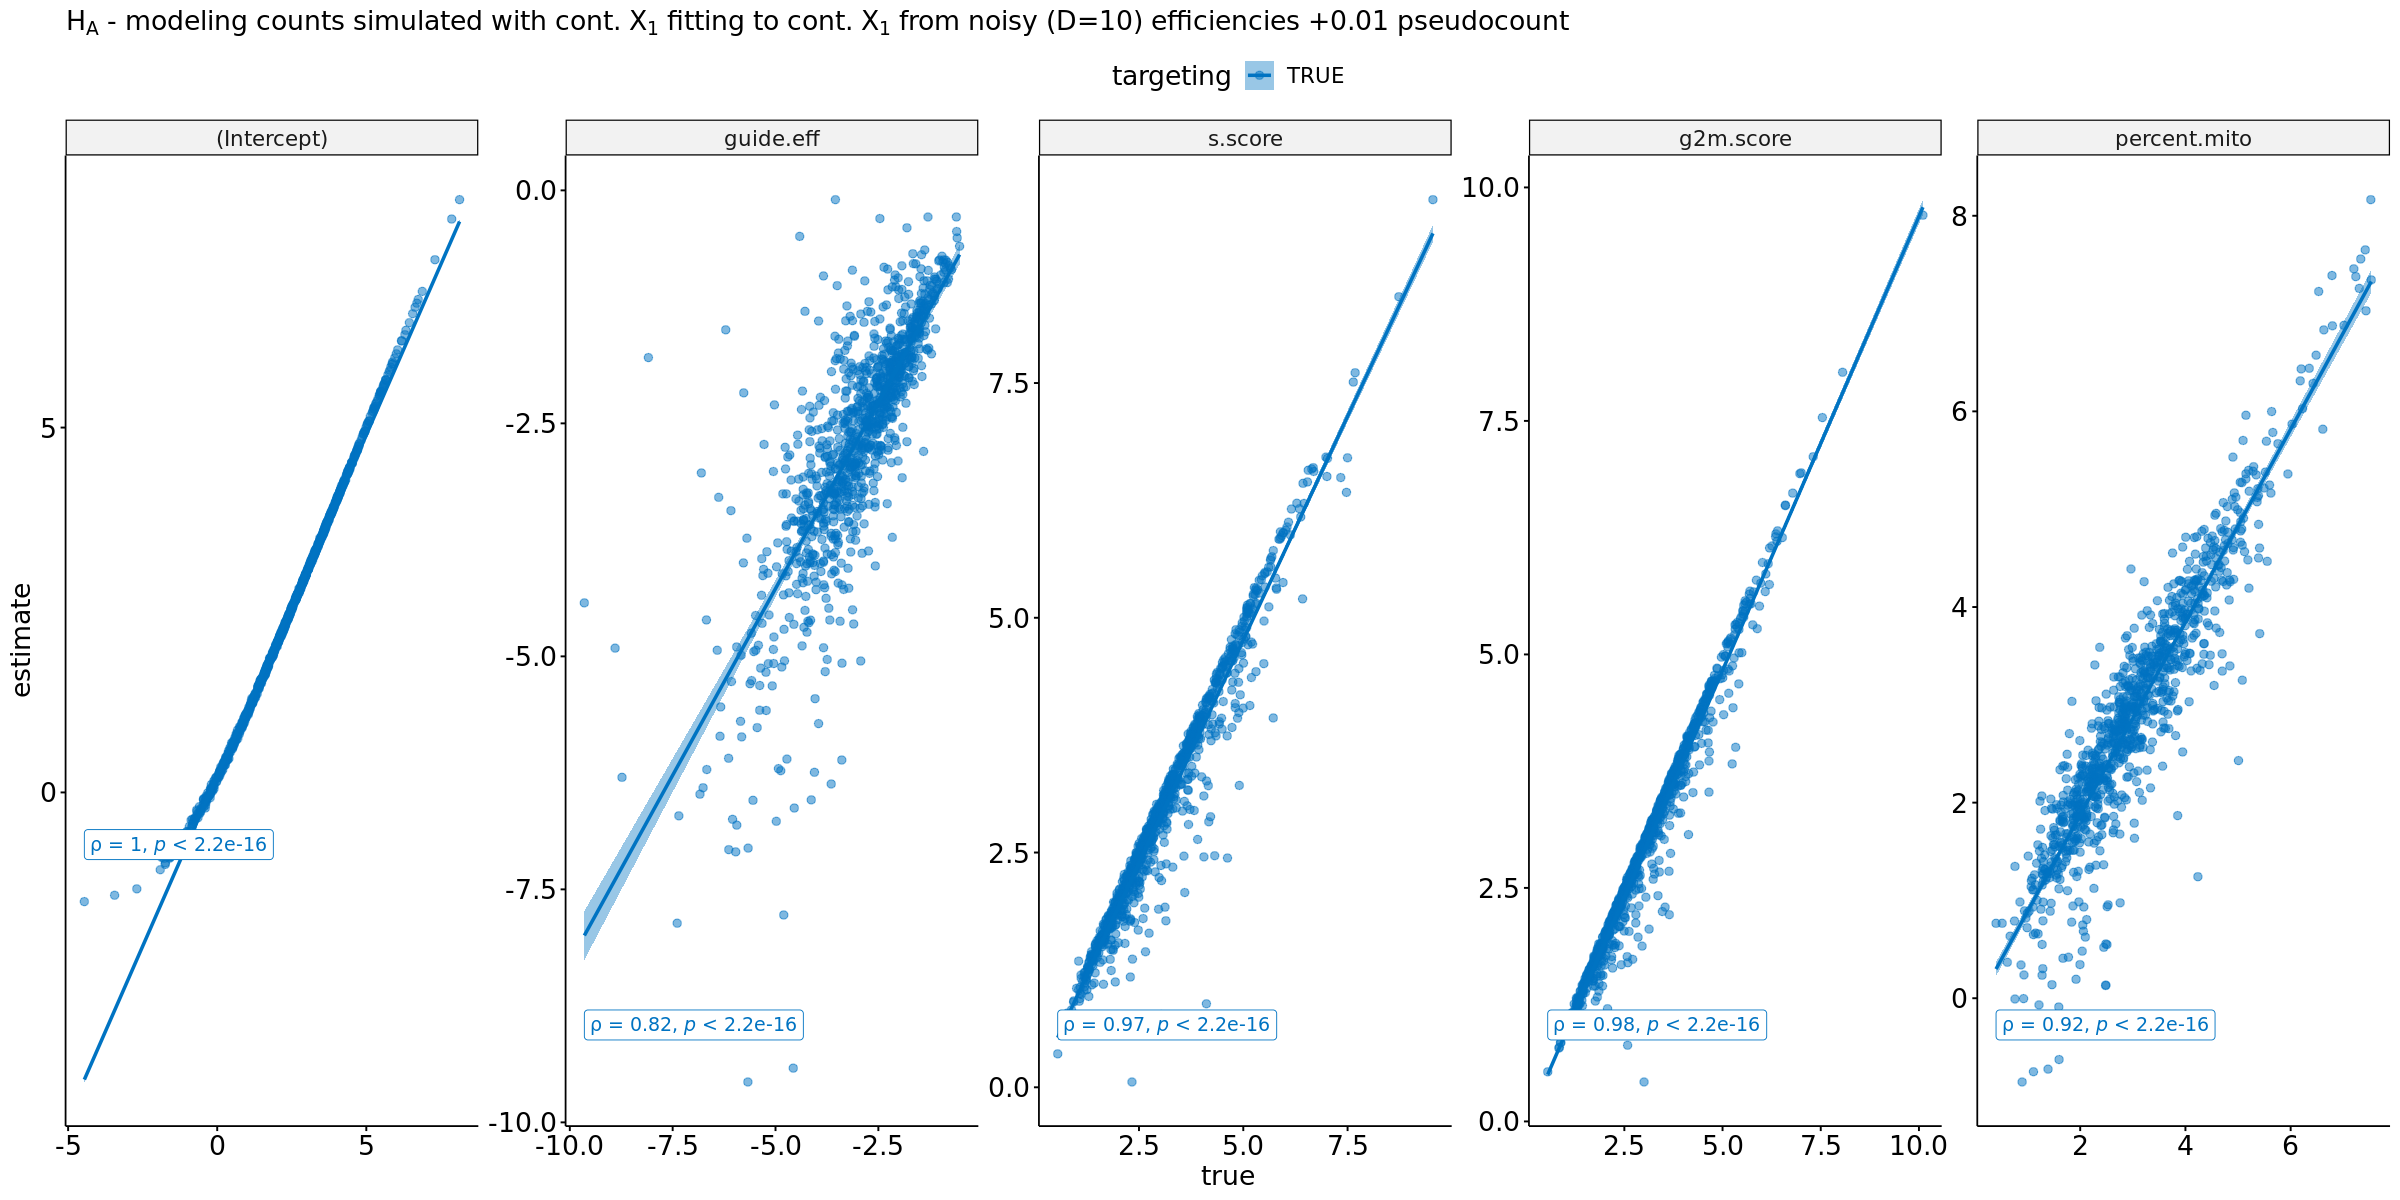

In [10]:
plt.title <- expression(paste("H"[A] ," - modeling counts simulated with cont. X"[1], " fitting to cont. X"[1], " from noisy (D=10) efficiencies +0.01 pseudocount"))

p.cont.counts.d10.cont.x1 <- coeffs_scatter(alt.coeffs.cont.counts.d10.cont.x1, plt.title)

p.cont.counts.d10.cont.x1

In [43]:
png(file.path(data.dir,
              "alt_coeffs_scatterplot_cont-counts_cont-x1_d10-noisy.png"),
    res = 300, units = "in", height = 7, width = 14)
print(p.cont.counts.d10.cont.x1)
dev.off()

tiff(file.path(data.dir,
               "alt_coeffs_scatterplot_cont-counts_cont_cont-x1_d10-noisy.tiff"),
    res = 100, units = "in", height = 7, width = 14)
print(p.cont.counts.d10.cont.x1)
dev.off()

`geom_smooth()` using formula 'y ~ x'



png 
  2

`geom_smooth()` using formula 'y ~ x'



png 
  2

Calculate MSE

In [44]:
# based on diff b/w true and estimated coeffs
alt.coeffs.cont.counts.d10.cont.x1 %>% group_by(term) %>% 
                                        group_map(~calculate_mse(.x)) %>% 
                                        setNames(unique(sort(alt.coeffs.cont.counts.d10.cont.x1$term)))

$`(Intercept)`
[1] 0.03727269

$g2m.score
[1] 0.06528683

$guide.eff
[1] 0.7523688

$percent.mito
[1] 0.2586462

$s.score
[1] 0.1076791

In [45]:
# based on fitting model
alt.coeffs.cont.counts.d10.cont.x1 %>% group_by(term) %>% 
                                        group_map(~calculate_mse_mod(.x)) %>% 
                                        setNames(unique(sort(alt.coeffs.cont.counts.d10.cont.x1$term)))

$`(Intercept)`
[1] 0.01994233

$g2m.score
[1] 0.05150656

$guide.eff
[1] 0.566919

$percent.mito
[1] 0.2101257

$s.score
[1] 0.08602538

## Modeling counts simulated with continuous $X_1$ and fitting with continuous $X_1$ based on noisy ($D=1$) guide efficiencies

In [11]:
# data.dir <- "/iblm/netapp/data1/jezhou/crisprQTL/sim_performance_D1-noisy_4guides_cont-x1_cont-counts_targeting"
data.dir <- "/iblm/netapp/data1/jezhou/crisprQTL/sim_performance_D1-noisy_2guides_cont-x1_cont-counts_targeting_pseudocount"

# alt.mods <- readRDS(file.path(data.dir,"sim_performance_true_efficiency_4guides_targeting/alt_ml.rds"))
# null.mods <- readRDS(file.path(data.dir,"sim_performance_true_efficiency_4guides_targeting/null_ml.rds"))

alt.coeffs.cont.counts.d1.cont.x1 <- read.csv(file.path(data.dir,"alt_coeffs.csv"))
null.coeffs.cont.counts.d1.cont.x1 <- read.csv(file.path(data.dir,"null_coeffs.csv"))

# lrt <- read.csv("../sim_performance_10/lrt_pvals.csv")

### Check which genes did not converge

In [12]:
alt.mods.d1 <- readRDS(file.path(data.dir, "alt_ml.rds"))

In [30]:
which(is.na(alt.mods.d1))

6178   743 11813 11511  8974  9177  9012  8034  1789 11110  4342  8100  7855 
   11    36    95   217   233   236   257   497   499   590   591   656   664 
10417  6139  5489 
  791   894   969

### Plot

`geom_smooth()` using formula 'y ~ x'



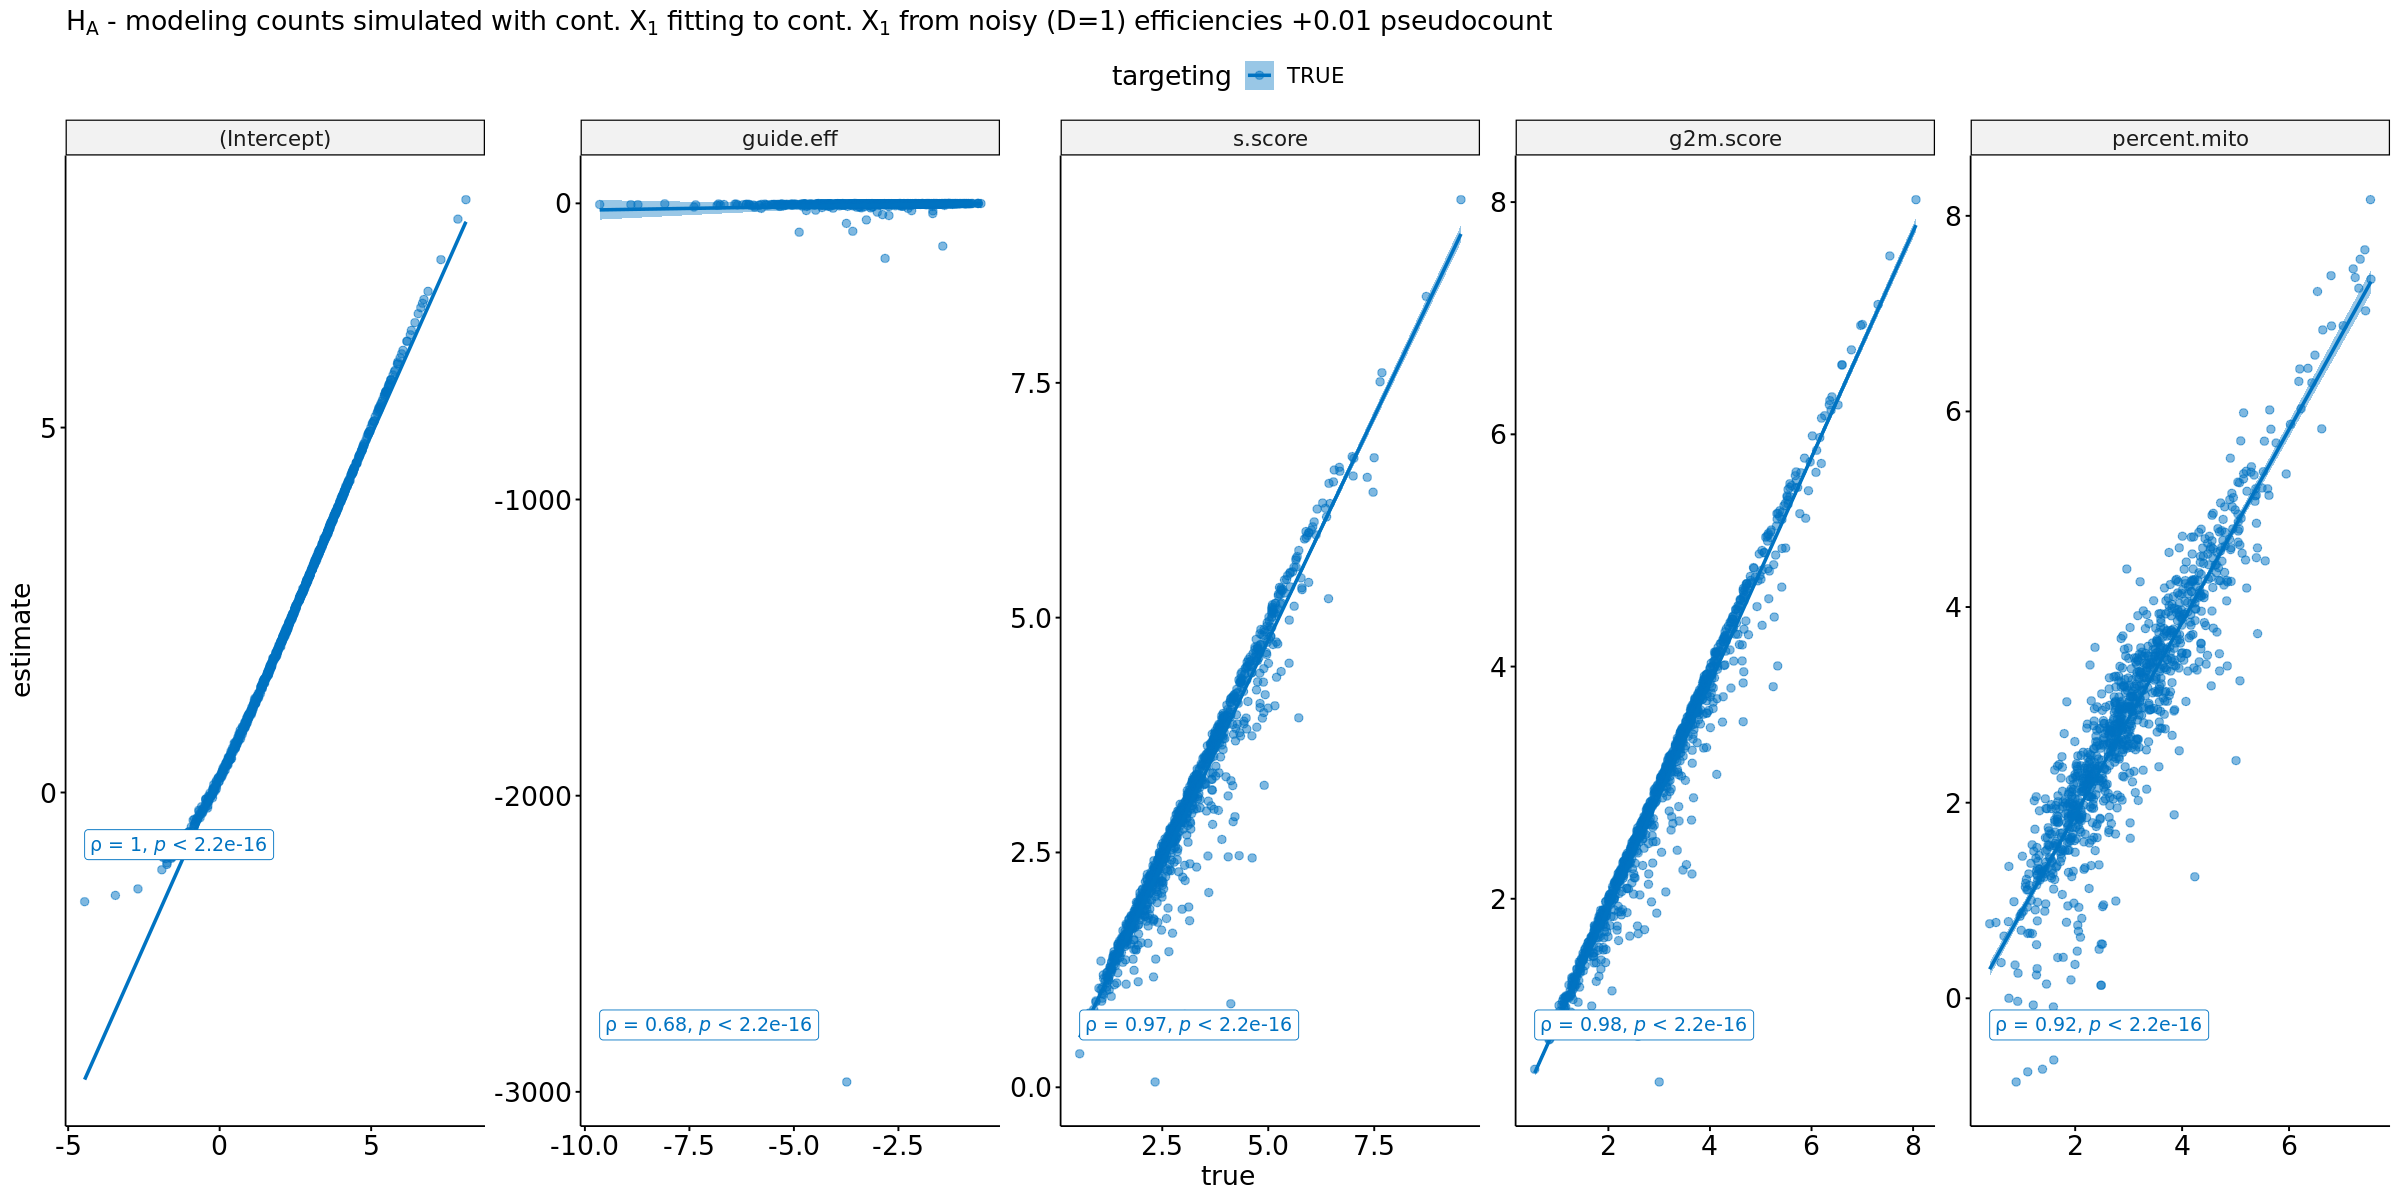

In [13]:
plt.title <- expression(paste("H"[A] ," - modeling counts simulated with cont. X"[1], " fitting to cont. X"[1], " from noisy (D=1) efficiencies +0.01 pseudocount"))

p.cont.counts.d1.cont.x1 <- coeffs_scatter(alt.coeffs.cont.counts.d1.cont.x1, plt.title)

p.cont.counts.d1.cont.x1

In [57]:
png(file.path(data.dir,
              "alt_coeffs_scatterplot_cont-counts_cont-x1_d1-noisy.png"),
    res = 300, units = "in", height = 7, width = 14)
print(p.cont.counts.d1.cont.x1)
dev.off()

tiff(file.path(data.dir,
               "alt_coeffs_scatterplot_cont-counts_cont_cont-x1_d1-noisy.tiff"),
    res = 100, units = "in", height = 7, width = 14)
print(p.cont.counts.d1.cont.x1)
dev.off()

`geom_smooth()` using formula 'y ~ x'



png 
  2

`geom_smooth()` using formula 'y ~ x'



png 
  2

Calculate MSE

In [33]:
# based on diff b/w true and estimated coeffs
alt.coeffs.cont.counts.d1.cont.x1 %>% group_by(term) %>% 
                                        group_map(~calculate_mse(.x)) %>% 
                                        setNames(unique(sort(alt.coeffs.cont.counts.d1.cont.x1$term)))

$`(Intercept)`
[1] 0.0009433895

$g2m.score
[1] 0.002864643

$guide.eff
[1] 71408.59

$percent.mito
[1] 0.3701951

$s.score
[1] 0.01203505

In [58]:
# based on fitting model
alt.coeffs.cont.counts.d1.cont.x1 %>% group_by(term) %>% 
                                        group_map(~calculate_mse_mod(.x)) %>% 
                                        setNames(unique(sort(alt.coeffs.cont.counts.d1.cont.x1$term)))

$`(Intercept)`
[1] 0.02005569

$g2m.score
[1] 0.0517116

$guide.eff
[1] 1.461877

$percent.mito
[1] 0.2109001

$s.score
[1] 0.08649705

Stitch together all MSE data

In [14]:
d100.mse <- alt.coeffs.cont.counts.d100.cont.x1 %>% group_by(term) %>% 
                                        group_map(~calculate_mse_mod(.x)) %>% 
                                        setNames(unique(sort(alt.coeffs.cont.counts.d100.cont.x1$term)))

d10.mse <- alt.coeffs.cont.counts.d10.cont.x1 %>% group_by(term) %>% 
                                        group_map(~calculate_mse_mod(.x)) %>% 
                                        setNames(unique(sort(alt.coeffs.cont.counts.d10.cont.x1$term)))

d1.mse <- alt.coeffs.cont.counts.d1.cont.x1 %>% group_by(term) %>% 
                                        group_map(~calculate_mse_mod(.x)) %>% 
                                        setNames(unique(sort(alt.coeffs.cont.counts.d1.cont.x1$term)))

In [15]:
d100.mse

$`(Intercept)`
[1] 0.01994554

$g2m.score
[1] 0.05147178

$guide.eff
[1] 0.4094257

$percent.mito
[1] 0.2100936

$s.score
[1] 0.08596031

In [16]:
d10.mse

$`(Intercept)`
[1] 0.01994233

$g2m.score
[1] 0.05150656

$guide.eff
[1] 0.566919

$percent.mito
[1] 0.2101257

$s.score
[1] 0.08602538

In [17]:
d1.mse

$`(Intercept)`
[1] 0.02005569

$g2m.score
[1] 0.0517116

$guide.eff
[1] 1.461877

$percent.mito
[1] 0.2109001

$s.score
[1] 0.08649705

In [18]:
noisy.mse <- data.frame(t(do.call(rbind, list(data.frame(d100.mse), data.frame(d10.mse), data.frame(d1.mse)))))
colnames(noisy.mse) <- c('D100','D10','D1')
noisy.mse

,D100,D10,D1
,<dbl>,<dbl>,<dbl>
X.Intercept.,0.01994554,0.01994233,0.02005569
g2m.score,0.05147178,0.05150656,0.05171160
guide.eff,0.40942567,0.56691896,1.46187654
percent.mito,0.21009360,0.21012571,0.21090015
s.score,0.08596031,0.08602538,0.08649705


In [91]:
write.csv(noisy.mse, "/iblm/netapp/data1/jezhou/crisprQTL/single_guide_single_gene_noisy_eff_mse_table.csv",
           quote = FALSE)

# Plot noisy results together

In [19]:
alt.coeffs.cont.counts.d100.cont.x1$D <- 100
alt.coeffs.cont.counts.d10.cont.x1$D <- 10
alt.coeffs.cont.counts.d1.cont.x1$D<- 1

alt.coeffs.noisy.plotdf <- do.call(rbind, 
                                   list(alt.coeffs.cont.counts.d100.cont.x1, 
                                        alt.coeffs.cont.counts.d10.cont.x1,
                                       alt.coeffs.cont.counts.d1.cont.x1))

alt.coeffs.noisy.plotdf$D <- as.factor(alt.coeffs.noisy.plotdf$D)

`geom_smooth()` using formula 'y ~ x'



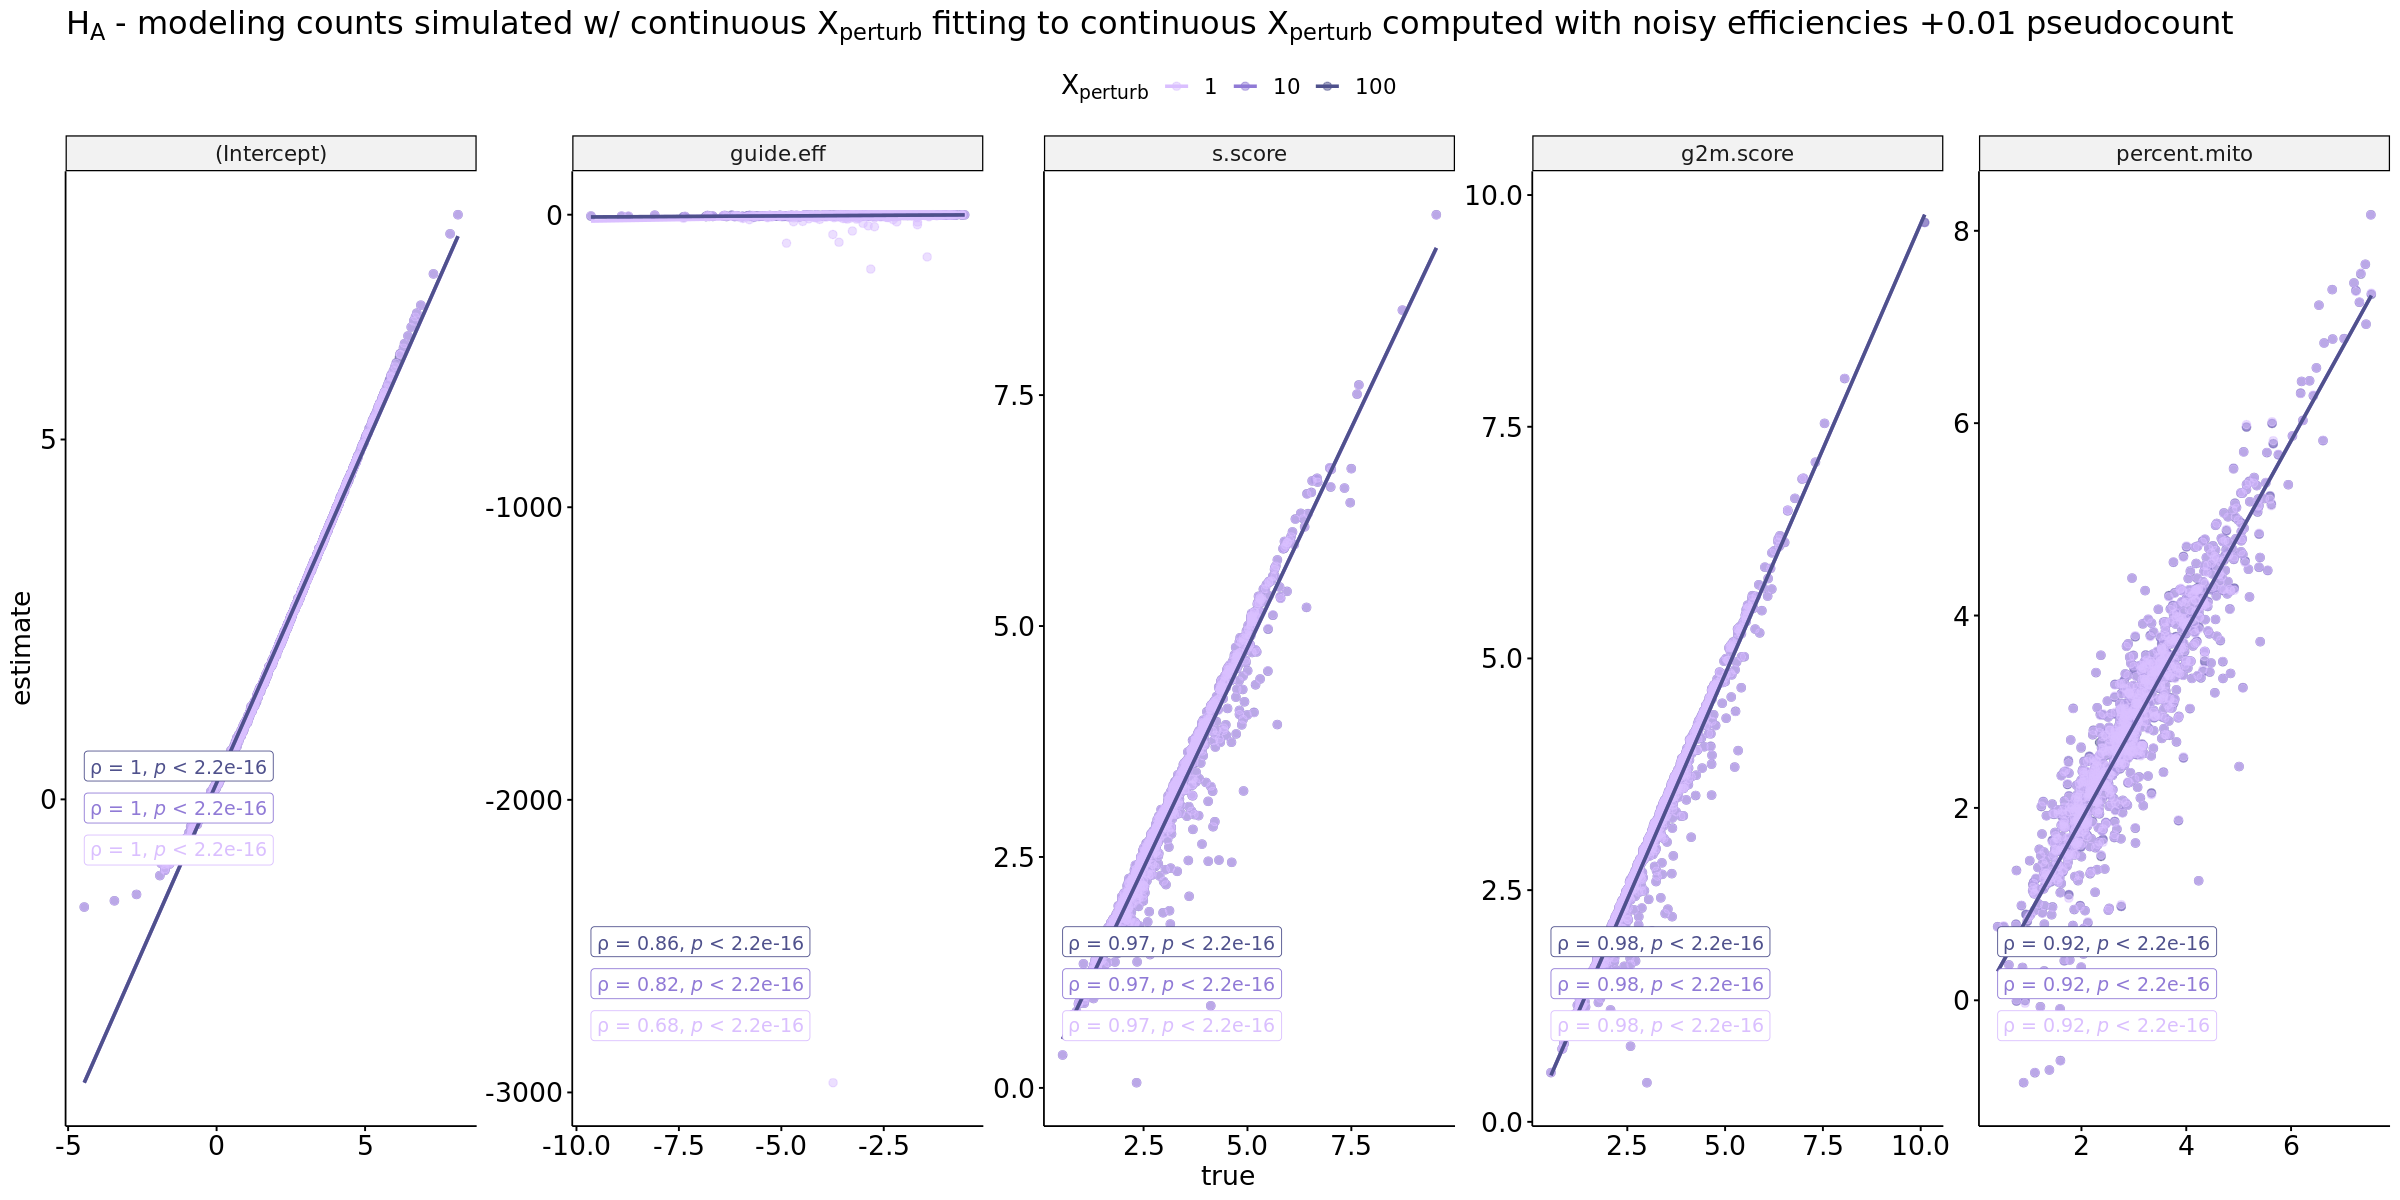

In [20]:
group.colors <- c(`1` = "#DABFFF", `10` = "#907AD6", `100` ="#4F518C")

alt.coeffs.noisy.plotdf %>%
        mutate(across(term, factor, levels=c("(Intercept)","guide.eff","s.score","g2m.score","percent.mito"))) %>% 
        ggscatter(x = "true", y = "estimate", color = "D", alpha = 0.5,
                  add = "reg.line"  # Add regression line
#                   conf.int = TRUE # add conf int
                 ) + 
        stat_cor(method = "spearman", aes(color = D), 
                 show.legend = FALSE, geom = "label", 
                 label.y.npc="bottom", label.x.npc = "left", size = 4,
                cor.coef.name = "rho") + 
        facet_wrap(~term, ncol = 5,  scales = "free") + 
            theme(text = element_text(size = 14)) + 
scale_fill_manual(values=group.colors) + 
scale_color_manual(values = group.colors) +
labs(color=expression(paste("X"[perturb]))) +
        ggtitle(expression(paste("H"[A] ," - modeling counts simulated w/ continuous X"[perturb], " fitting to continuous X"[perturb], " computed with noisy efficiencies +0.01 pseudocount"))) +
theme(text = element_text(size = 16))

In [21]:
png(file.path("/iblm/netapp/data1/jezhou/crisprQTL", "alt_coeffs_scatterplot_cont-counts_cont-x1_noisy_eff_PSEUDOCOUNT.png"),
    res = 300, units = "in", height = 7, width = 14)

alt.coeffs.noisy.plotdf %>%
        mutate(across(term, factor, levels=c("(Intercept)","guide.eff","s.score","g2m.score","percent.mito"))) %>% 
        ggscatter(x = "true", y = "estimate", color = "D", alpha = 0.5,
                  add = "reg.line"  # Add regression line
#                   conf.int = TRUE # add conf int
                 ) + 
        stat_cor(method = "spearman", aes(color = D), 
                 show.legend = FALSE, geom = "label", 
                 label.y.npc="bottom", label.x.npc = "left", size = 4,
                cor.coef.name = "rho") + 
        facet_wrap(~term, ncol = 5,  scales = "free") + 
            theme(text = element_text(size = 14)) + 
scale_fill_manual(values=group.colors) + 
scale_color_manual(values = group.colors) +
labs(color=expression(paste("X"[perturb]))) +
        ggtitle(expression(paste("H"[A] ," - modeling counts simulated w/ continuous X"[perturb], " fitting to continuous X"[perturb], " computed with noisy efficiencies +0.01 pseudocount"))) +
theme(text = element_text(size = 16),
     plot.title = element_text(size = 14))

dev.off()

tiff(file.path("/iblm/netapp/data1/jezhou/crisprQTL", "alt_coeffs_scatterplot_cont-counts_cont-x1_noisy_eff_PSEUDOCOUNT.tiff"),
    res = 100, units = "in", height = 7, width = 14)

alt.coeffs.noisy.plotdf %>%
        mutate(across(term, factor, levels=c("(Intercept)","guide.eff","s.score","g2m.score","percent.mito"))) %>% 
        ggscatter(x = "true", y = "estimate", color = "D", alpha = 0.5,
                  add = "reg.line"  # Add regression line
#                   conf.int = TRUE # add conf int
                 ) + 
        stat_cor(method = "spearman", aes(color = D), 
                 show.legend = FALSE, geom = "label", 
                 label.y.npc="bottom", label.x.npc = "left", size = 4,
                cor.coef.name = "rho") + 
        facet_wrap(~term, ncol = 5,  scales = "free") + 
            theme(text = element_text(size = 14)) + 
scale_fill_manual(values=group.colors) + 
scale_color_manual(values = group.colors) +
labs(color=expression(paste("X"[perturb]))) +
        ggtitle(expression(paste("H"[A] ," - modeling counts simulated w/ continuous X"[perturb], " fitting to continuous X"[perturb], " computed with noisy efficiencies +0.01 pseudocount"))) +
theme(text = element_text(size = 16),
     plot.title = element_text(size = 14))

dev.off()

`geom_smooth()` using formula 'y ~ x'



png 
  2

`geom_smooth()` using formula 'y ~ x'



png 
  2